# Predicting Loan Default


**Introduction:**

In the banking sector, the ability to accurately predict loan default is essential to ensure the stability of lending institutions. The more accurate predictions are, greater quantities of loans can be granted to individuals at low risk. To this end, this notebook aims to construct analytical models to aid lending firms with decision making. The dataset used is from Kaggle, and is available at the following link:
https://www.kaggle.com/datasets/nikhil1e9/loan-default

The file on the site is 25 mb, so the number of data points used was reduced to 0.5% of original size to be under 10mb (over 1,000 points), and to reduce computational time (it was found later in the analysis that the computation time was too high). The code to do so is given in the cell block below (commented out, since it was done on my computer). 

**Problem Definition:**

With the help of data analytics techniques, this project aims to find if it is possible to explain the default of a person's loan based on attributes of the person's loan application. The objectives of this report encompass the following: 

1. To develop four models with a reasonably strong predictive capability for gauging the default rate. 

2. To evaluate whether the variables given in the dataset are useful for loan default prediction. 

3. If the analytical model allows, quantify the effect of the variable. 

**Problem Approach:**

1. Data Cleaning & Exploratory Data Analysis

2. Data Splitting

3. Model Validation & Hyperparameter Tuning Approach

4. Logistic Regression Model Creation

5. SVM Model Creation

6. K-Nearest Neighbor Model Creation

7. Model Selection

8. Conclusion & Recommendations

**1. Data Cleaning & Exploratory Data Analysis**

In this step, the data will first be examined by checking if there are any missing values. Next, the binary variables will be created, and finally a correlation matrix will check for multicollinearity. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import statsmodels.api as sm
# import os

# myData = pd.read_csv('Loan_default.csv')

# # Keep 0.5% of the original rows
# myData_sample = myData.sample(frac=0.005, random_state=42)

# # Save file
# myData_sample.to_csv('Loan_default_sampled_1.csv', index=False)

In [22]:
myData = pd.read_csv('Loan_default_sampled_1.csv')

In [23]:
myData.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0


In [24]:
myData.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,43.862960,80826.249804,130009.221613,573.758810,60.812060,2.520752,13.735137,35.436179,0.504205,0.104150
std,15.122204,38412.791142,71349.378316,160.086315,34.300202,1.138077,6.783437,17.060699,0.233866,0.305575
min,18.000000,15468.000000,5224.000000,300.000000,0.000000,1.000000,2.080000,12.000000,0.100000,0.000000
25%,31.000000,46681.000000,68127.000000,440.000000,32.000000,1.000000,7.590000,24.000000,0.300000,0.000000
50%,44.000000,80798.000000,131929.000000,574.000000,63.000000,3.000000,13.940000,36.000000,0.510000,0.000000
75%,57.000000,112519.000000,192828.000000,713.000000,90.000000,4.000000,19.710000,48.000000,0.700000,0.000000
max,69.000000,149845.000000,249912.000000,849.000000,119.000000,4.000000,24.950000,60.000000,0.900000,1.000000


Above is the summary of the dataset. The overall statistics look reasonable, so we will begin the cleaning process. 

In [25]:
na_values = myData.isna()
print(na_values.sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


It appears that there are no NA values that need to be imputed, or removed. Let's continue with more exploratory data analysis. Let's have a look at the datatypes of each variable. 

In [26]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          1277 non-null   object 
 1   Age             1277 non-null   int64  
 2   Income          1277 non-null   int64  
 3   LoanAmount      1277 non-null   int64  
 4   CreditScore     1277 non-null   int64  
 5   MonthsEmployed  1277 non-null   int64  
 6   NumCreditLines  1277 non-null   int64  
 7   InterestRate    1277 non-null   float64
 8   LoanTerm        1277 non-null   int64  
 9   DTIRatio        1277 non-null   float64
 10  Education       1277 non-null   object 
 11  EmploymentType  1277 non-null   object 
 12  MaritalStatus   1277 non-null   object 
 13  HasMortgage     1277 non-null   object 
 14  HasDependents   1277 non-null   object 
 15  LoanPurpose     1277 non-null   object 
 16  HasCoSigner     1277 non-null   object 
 17  Default         1277 non-null   i

The variables of Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, and HasCoSigner are all categorical variables that need to be converted. For some of these variables, such as Education, we can either use label encoding. However, for better interpretability and versatility in model choice, we will continue with one-hot encoding. This approach will result in higher dimensionality, but we proceed since there are over 100,000 points, and the total number of features won't increase drastically. The following cells create the dummy variables. 

First we set the reference case for each variable by reordering the categories, then we create the dummy variables. 

In [27]:
# Let's first have a look at the unique values in each column. 

for col in myData.iloc[:, 10:17].columns:
    unique_vals = myData[col].unique()
    print(unique_vals)




['PhD' 'High School' "Master's" "Bachelor's"]
['Self-employed' 'Part-time' 'Unemployed' 'Full-time']
['Single' 'Divorced' 'Married']
['Yes' 'No']
['Yes' 'No']
['Home' 'Education' 'Business' 'Other' 'Auto']
['No' 'Yes']


In [28]:
# Now let's order them so that we can set the reference level in the next step. 

myData['Education'] = pd.Categorical(myData['Education'], categories=['High School', "Bachelor's", "Master's", "PhD"], ordered=True)

myData['EmploymentType'] = pd.Categorical(myData['EmploymentType'], categories=['Unemployed', "Part-time", "Full-time", "Self-employed"], ordered=True)

myData['MaritalStatus'] = pd.Categorical(myData['MaritalStatus'], categories=['Single', 'Divorced', 'Married'], ordered=True)

myData['HasMortgage'] = pd.Categorical(myData['HasMortgage'], categories=['No', 'Yes'], ordered=True)

myData['HasDependents'] = pd.Categorical(myData['HasDependents'], categories=['No', 'Yes'], ordered=True)

myData['MaritalStatus'] = pd.Categorical(myData['MaritalStatus'], categories=['Single', 'Divorced', 'Married'], ordered=True)

myData['LoanPurpose'] = pd.Categorical(myData['LoanPurpose'], categories=['Home', 'Education', 'Business', 'Other', 'Auto'], ordered=True)

myData['HasCoSigner'] = pd.Categorical(myData['HasCoSigner'], categories=['No', 'Yes'], ordered=True)

# Let's confirm the order again. 

for col in myData.iloc[:, 10:17].columns:
    unique_vals = myData[col].unique()
    print(unique_vals)


['PhD', 'High School', 'Master's', 'Bachelor's']
Categories (4, object): ['High School' < 'Bachelor's' < 'Master's' < 'PhD']
['Self-employed', 'Part-time', 'Unemployed', 'Full-time']
Categories (4, object): ['Unemployed' < 'Part-time' < 'Full-time' < 'Self-employed']
['Single', 'Divorced', 'Married']
Categories (3, object): ['Single' < 'Divorced' < 'Married']
['Yes', 'No']
Categories (2, object): ['No' < 'Yes']
['Yes', 'No']
Categories (2, object): ['No' < 'Yes']
['Home', 'Education', 'Business', 'Other', 'Auto']
Categories (5, object): ['Home' < 'Education' < 'Business' < 'Other' < 'Auto']
['No', 'Yes']
Categories (2, object): ['No' < 'Yes']


In [29]:
# Now we can create the dummy variables. 

myData_encoded = pd.get_dummies(myData, columns=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], drop_first=True)
myData_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LoanID                        1277 non-null   object 
 1   Age                           1277 non-null   int64  
 2   Income                        1277 non-null   int64  
 3   LoanAmount                    1277 non-null   int64  
 4   CreditScore                   1277 non-null   int64  
 5   MonthsEmployed                1277 non-null   int64  
 6   NumCreditLines                1277 non-null   int64  
 7   InterestRate                  1277 non-null   float64
 8   LoanTerm                      1277 non-null   int64  
 9   DTIRatio                      1277 non-null   float64
 10  Default                       1277 non-null   int64  
 11  Education_Bachelor's          1277 non-null   uint8  
 12  Education_Master's            1277 non-null   uint8  
 13  Edu

As shown, the reference cases are the following:

1. Education: High school
2. EmplymentType: Unemployed
3. MaritalStatus: Single
4. HasMortgage: No
5. HasDependents: No
6. LoanPurpose: Home
7. HasCosigner: No

No that we have processed the data, we can analyze the data in greater detail, for example, by creating a correlation matrix. 

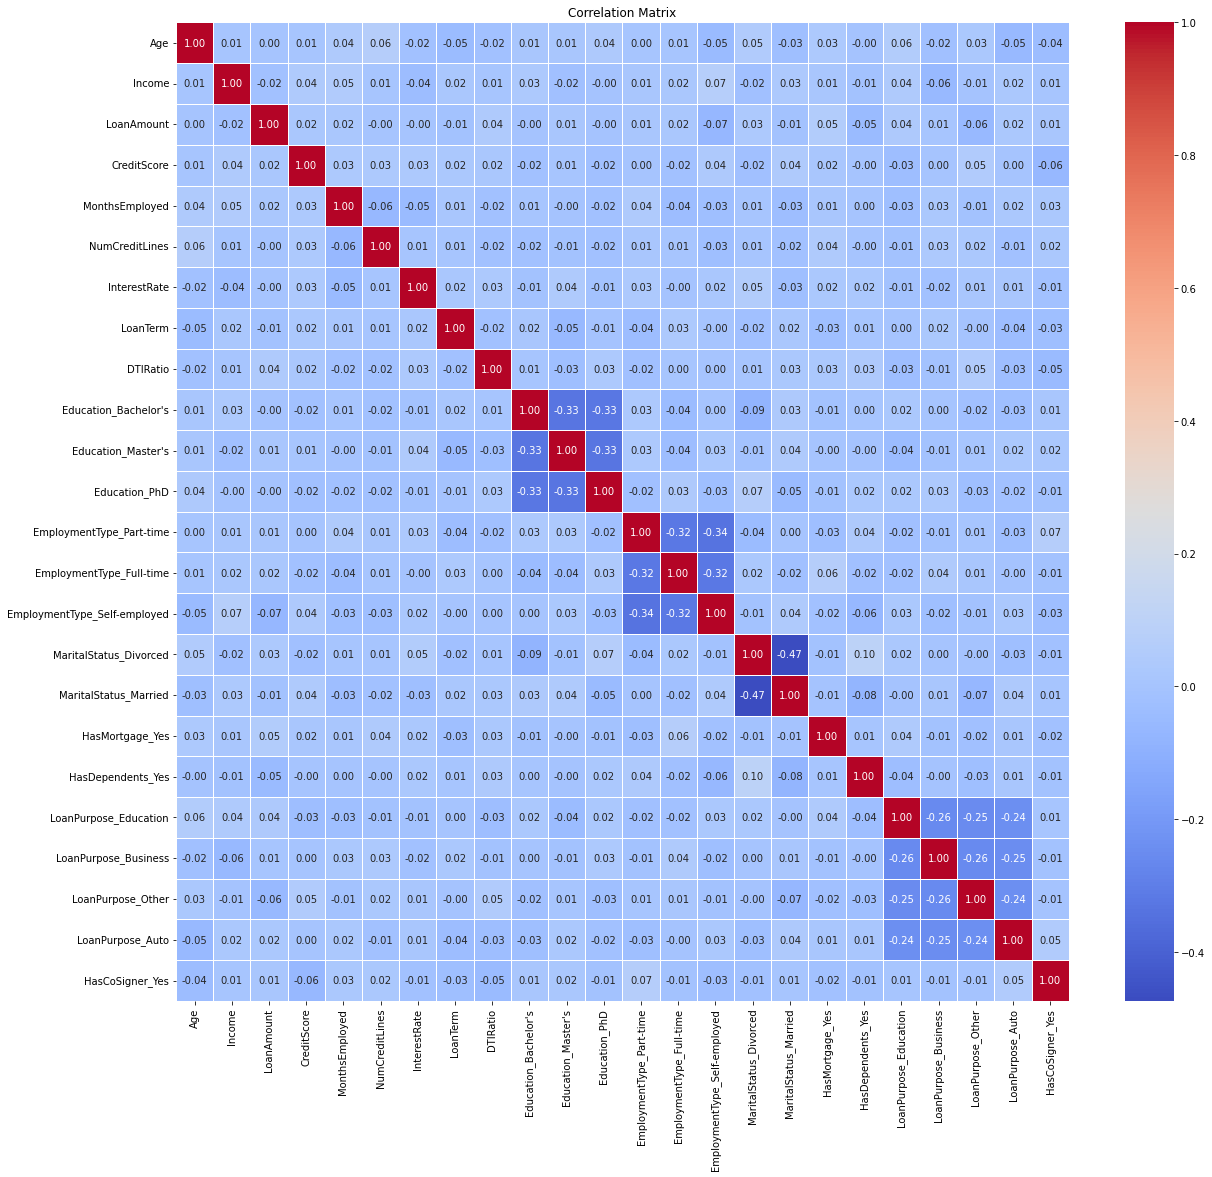

In [30]:
myData_encoded = myData_encoded.drop('LoanID', axis=1)

correlation_matrix = myData_encoded.loc[:, myData_encoded.columns != 'Default'].corr() # Create correlation matrix

plt.figure(figsize=(20, 18))
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

As expected, the dummy variables have significant correlation with each other (dummy variable trap). This was mitigated to some extent when we dropped the reference case when we encoded the dummy variables. Apart from the dummy variables, there does not appear to be significant correlation between variables. 

Now that we've done some exploratory analysis on the dataset, let's begin creating models, beginning with data splitting. 

**2. Data Splitting:**

The procedure to train an analytical model starts with splitting the data into training and testing sets. For this project, 85% was used for training and 15% was used for testing. 

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Separate features (X) and label column (y)
X = myData_encoded.drop('Default', axis=1)  # Drop the label column (Default column)
y = myData_encoded['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #Split the data

**3. Model Validation & Hyperparameter Tuning Approach:**

The training set is used to select the best performing model from all model types and hyperparameter sets. To select the best combination, the accuracy values of each model type and hyperparameter combination needs to be calculated using unseen data. The method of validation for the model types and hyperparameter combinations is the k-fold validation method, where the best combination is chosen using k=5. In this case, each data point will be used four times for training, and once for validation, and the accuracy values will be calculated by averaging the results from the 5 folds. The model with the highest accuracy will be deemed as the best model. In python, this is accomplished by first obtaining the best hyperparameter set within each model type, and then manually comparing the performance results between the best performing five model types. Once the best model type and hyperparameter combination is selected, we cannot simply present the validation accuracy values as the true performance of the model. The process of selecting the best model would likely result in selection bias, where the best model is also the best model that fits to random patterns in the cross validation sets. For this reason, the testing set is used to obtain an unbiased accuracy value.

**4. Logistic Regression Model Creation:**

The logistic regression model does not have many hyperparameters to be tuned, except for the regularization parameter. The regularization parameter allows there to be a balance between bias and variance. 

Unfortunately, when using 100,000 data points, the computation time was too high. The amount of data used was massively reduced, to around 0.5% of the original dataset in order to have reasonable computation times. 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_logistic = LogisticRegression(max_iter = 50000, solver = 'liblinear', penalty = 'l1')

# param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet']}
# first grid search: LogisticRegression(C=0.01, max_iter=50000, penalty='l1', solver='saga')
# accuracy = 0.8809998082362529

# second grid search
param_grid = {'C': [0.01]}

grid_search = GridSearchCV(model_logistic, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_

best_model = grid_search.best_estimator_

best_accuracy = grid_search.best_score_

print(best_C)
print(best_model)
print(best_accuracy)

# Final output after grid search:

# {'C': 0.01, 'penalty': 'l1'}
# LogisticRegression(C=0.01, max_iter=50000, penalty='l1', solver='saga')
# 0.8849639199625583

{'C': 0.01}
LogisticRegression(C=0.01, max_iter=50000, penalty='l1', solver='liblinear')
0.8995391705069125


Above is the best model, given from the grid search. The computational time increases significantly as you decrease the regularization parameter C. The l1 regularization parameter (lasso regression) was used, which reduces the number of variables. At first glance, this is somewhat surprising, because the amount of data is significantly larger than the number of features, and so overfitting shouldn't be a significant issue. However, the accuracy found was around 89.95%, which indicates no predictive power. From the EDA section (when myData.describe() is used), the mean of the default rate is roughly 10%. 

In [33]:
coefs = best_model.coef_[0]

logistic_coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})

print(logistic_coefs)

                         Feature  Coefficient
0                            Age    -0.049627
1                         Income    -0.000012
2                     LoanAmount     0.000005
3                    CreditScore    -0.000246
4                 MonthsEmployed    -0.007838
5                 NumCreditLines     0.000000
6                   InterestRate     0.046935
7                       LoanTerm     0.000000
8                       DTIRatio     0.000000
9           Education_Bachelor's     0.000000
10            Education_Master's     0.000000
11                 Education_PhD     0.000000
12      EmploymentType_Part-time     0.000000
13      EmploymentType_Full-time     0.000000
14  EmploymentType_Self-employed     0.000000
15        MaritalStatus_Divorced     0.000000
16         MaritalStatus_Married     0.000000
17               HasMortgage_Yes     0.000000
18             HasDependents_Yes     0.000000
19         LoanPurpose_Education     0.000000
20          LoanPurpose_Business  

As shown, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, and LoanTerm were the only variables selected by Lasso Regression. 

**5. Support Vector Machine (SVM) Model Creation:**

Support Vector Machine (SVM) is a machine learning algorithm that is mainly used for classification. It works by separating variables with a decision boundary. The decision boundary can be linear or non-linear, depending on the specified kernel. In python, the SVM model can be trained by tuning several hyperparameters. In this report, several kernels will be explored, along with their respective hyperparameters.   

When using the linear kernel, only the C-parameter will be tuned. Smaller C values make a more flexible classifier, while higher C values result in a harder decision boundary, which lowers the number of misclassified points in the validation set. As with the C parameter earlier, it strikes a balance between bias and variance, which smaller C values having lower complexity and a lower chance of overfitting. The RBF kernel requires that we tune the C parameter and the σ (sigma) parameter. The σ parameter determines the width of the Gaussian function in the kernel. Lower values of σ raise the likelihood of overfitting, while higher values lower the likelihood of overfitting. The degree specifies the highest degree of the polynomial decision boundary, with higher degrees resulting in more complex models and lower degrees yielding more generalized models. 

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#Scaling data first for SVM and KNN
X_train_continuous = X_train[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]
X_test_continuous = X_test[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]

scaler = StandardScaler()

scaled_continuous_train_data = scaler.fit_transform(X_train_continuous)
scaled_continuous_test_data = scaler.fit_transform(X_test_continuous)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']] = scaled_continuous_train_data
X_test_scaled[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']] = scaled_continuous_test_data

X_train_scaled.head()
X_test_scaled.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,EmploymentType_Self-employed,MaritalStatus_Divorced,MaritalStatus_Married,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Education,LoanPurpose_Business,LoanPurpose_Other,LoanPurpose_Auto,HasCoSigner_Yes
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,1.711594e-16,-1.156482e-16,1.272131e-17,-2.359224e-16,8.326673e-17,-7.401487e-17,5.551115e-17,-2.775558e-17,5.551115e-17,0.250000,...,0.229167,0.333333,0.322917,0.453125,0.557292,0.197917,0.208333,0.203125,0.192708,0.531250
std,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,1.002614e+00,0.434145,...,0.421396,0.472637,0.468814,0.499099,0.498005,0.399471,0.407178,0.403377,0.395457,0.500327
min,-1.620544e+00,-1.697530e+00,-1.667161e+00,-1.837028e+00,-1.906653e+00,-1.286909e+00,-1.647521e+00,-1.410844e+00,-1.572607e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.257366e-01,-9.195884e-01,-8.674371e-01,-8.282750e-01,-7.052048e-01,-1.286909e+00,-9.447023e-01,-7.126943e-01,-9.576569e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.712841e-03,-5.921676e-02,-1.088121e-01,1.154001e-02,-3.084363e-02,-4.138117e-01,7.849097e-02,-1.454478e-02,-1.473318e-02,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.001526e-01,8.600569e-01,9.589858e-01,8.156182e-01,8.217970e-01,1.332383e+00,7.716459e-01,6.836047e-01,8.871939e-01,0.250000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.675752e+00,1.597428e+00,1.630252e+00,1.697668e+00,1.751950e+00,1.332383e+00,1.748009e+00,1.381754e+00,1.707128e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
svm_classifier = SVC()

# param_grid_svm = {
#     'C': [0.001, 0.01, 0.1, 1, 10]
# } # for searching linear kernel

param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4], 'kernel': ['linear', 'poly', 'sigmoid', 'rbf']
} # for searching poly kernel

grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')

grid_search_svm.fit(X_train_scaled, y_train)

best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_
best_accuracy_svm = grid_search_svm.best_score_
print(best_model_svm)
print(best_params_svm)
print(best_accuracy_svm)
# SVC(C=0.001, degree=2, kernel='poly')
# {'C': 0.001, 'degree': 2}
# 0.8958525345622121

SVC(C=0.001, degree=2, kernel='linear')
{'C': 0.001, 'degree': 2, 'kernel': 'linear'}
0.8958525345622121


The results of the SVM classifier appear to be quite close compared to the logistic regression classifier, again showing no predictive power. . 

**6. K-Nearest Neighbor (KNN) Model Creation:**

The KNN model works by calculating the distance of the prediction features to the nearest k data points. The prediction data point is then assigned the label with the greatest

The KNN model works by finding the k training data points in the feature space that are closest to a new data point and predicts the class or value based on the majority of these neighbors. So if k = 5, and of the 5 neighbors, one of them has label 1 and four have the label 0, then the label predicted for the new point is 0 (4 > 1). 

The hyperparameter that needs tuning is the k-value, the method of calculating the distance, p (either 1 or 2) and the weightage of the nearest neighbors, either uniform (equal weights to all points) or distance (higher weights to closer points). 

In [36]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
best_accuracy_knn = grid_search_knn.best_score_
print(best_model_knn)
print(best_params_knn)
print(best_accuracy_knn)

KNeighborsClassifier(n_neighbors=9)
{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.896774193548387


**7. Model Selection:**

It appears that all of the models performed approximately the same, with very little difference in accuracy. From the exploratory data analysis (when using myData.describe()), roughly 10% of the data points were defaults. In this case, it means that our results have no reasonable predictive power, since the accuracies are around 90%, which would be achieved through random selection. 

Even though our analsis has not been fruitful, below is the method to describe the logistic regression model, if it were to actually have any predictive power. The logistic regression model is particularly useful in lending decisions due to its interpretability compared to other models. Below are the coefficients again. 

As an example, the interpretation of the Age coefficient is as follows:

"As the age of a borrower increases by 1, the log-odds of default decreases by 0.049, all else kept constant."

Surprisingly, the direction of the coefficients makes sense, older borrowers are expected to be more reliable when making payments, and the higher the interest rate, the higher the rate of default. Riskier borrowers are often given higher interest rates to balance risk vs reward. 

However, the magnitudes of each coefficient are unusual. 

The coefficient with the largest magnitude is Age, which is a stronger predictor than interest rate. Credit score has a lesser than expected impact on default than expected. 

In addition, the lasso regression (when lasso regression was used, it resulted in the best performance) left out other key variables which are generally considered important, for example the DTI Ratio (Debt to Income ratio), which is quite important when making lending decisions. 

In [37]:
logistic_coefs

,Feature,Coefficient
0,Age,-0.049627
1,Income,-0.000012
2,LoanAmount,0.000005
3,CreditScore,-0.000246
4,MonthsEmployed,-0.007838
5,NumCreditLines,0.000000
6,InterestRate,0.046935
7,LoanTerm,0.000000
8,DTIRatio,0.000000
9,Education_Bachelor's,0.000000


Now that the model is selected, we can test it using the testing data. 

Confusion Matrix:
[[171   1]
 [ 20   0]]
0.890625
0.0
0.0
0.49709302325581395


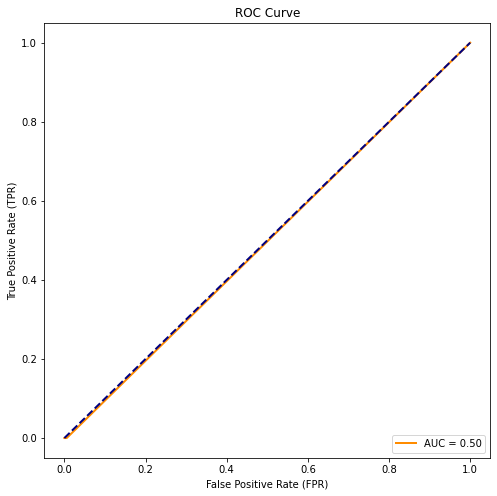

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set
y_pred = best_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

print("Confusion Matrix:")
print(conf_matrix)
print(accuracy)
print(precision)
print(recall)
print(roc_auc)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**8. Conclusion & Recommendations:**

In conclusion, we were not able to create a model with significant predictive power, as the accuracy values and the AUC value confirms. The reason for this is likely due to the fact that only a small portion of the data was used. If there does exist a pattern in the data with predictive power, it is indeed very subtle. For improvement, I would make the following recommendations for future analysis: 

1. More computational power would be useful to make use of all of the data. 
2. Using machine learning models that scale well as the amount of data increases, for example, random forest. In this analysis, SVM in particular was the limiting factor as it could not perform efficiently with data set sizes larger than 2000 points, even when using different functions (e.g. using LinearSVC). Logistic regression also failed to perform at sizes greater than 5000 points, even when using solvers like 'saga', which is recommended in the scikit-learn documentation for larger datasets. Some recommendations for future analysis would be random forest as the computation time is often regarded to scale linearly with training data size. 